In [87]:
import cv2
import matplotlib.pyplot as plt

In [88]:
img = cv2.imread("../fastai_notes/data/puppy.jpg")

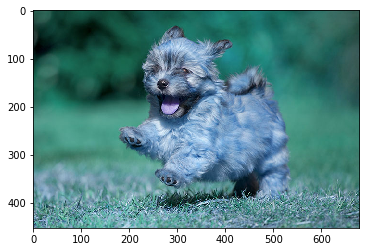

In [89]:
plt.imshow(img);

In [116]:
import os
from datetime import datetime
import numpy as np

class GoogleNetResize():
    """
    crop 8%~100% of the original image
    See `Going Deeper with Convolutions` by Google.
    """
    def __init__(self, crop_area_fraction=0.08,
                 aspect_ratio_low=0.75, aspect_ratio_high=1.333,
                 target_shape=224):
        #self._init(locals()) # Removed locals
        self.crop_area_fraction = crop_area_fraction
        self.aspect_ratio_low = aspect_ratio_low
        self.aspect_ratio_high = aspect_ratio_high
        self.target_shape = target_shape
        _RNG_SEED = 42 # I manually set this
        def get_rng(obj=None):
            """
            Get a good RNG seeded with time, pid and the object.
            Args:
                obj: some object to use to generate random seed.
            Returns:
                np.random.RandomState: the RNG.
            """
            seed = (id(obj) + os.getpid() +
                    int(datetime.now().strftime("%Y%m%d%H%M%S%f"))) % 4294967295
            if _RNG_SEED is not None:
                seed = _RNG_SEED
            return np.random.RandomState(seed)
    
        self.rng = get_rng(self)    

    def _augment(self, img):
        h, w = img.shape[:2]
        area = h * w
        for _ in range(10):
            targetArea = self.rng.uniform(self.crop_area_fraction, 1.0) * area
            aspectR = self.rng.uniform(self.aspect_ratio_low, self.aspect_ratio_high)
            ww = int(np.sqrt(targetArea * aspectR) + 0.5)
            hh = int(np.sqrt(targetArea / aspectR) + 0.5)
            if self.rng.uniform() < 0.5:
                ww, hh = hh, ww
            if hh <= h and ww <= w:
                x1 = 0 if w == ww else self.rng.randint(0, w - ww)
                y1 = 0 if h == hh else self.rng.randint(0, h - hh)
                out = img[y1:y1 + hh, x1:x1 + ww]
                out = cv2.resize(out, (self.target_shape, self.target_shape), interpolation=cv2.INTER_CUBIC)
                return out
        out = imgaug.ResizeShortestEdge(self.target_shape, interp=cv2.INTER_CUBIC).augment(img)
        out = imgaug.CenterCrop(self.target_shape).augment(out)
        return out

In [121]:
gnr = GoogleNetResize()

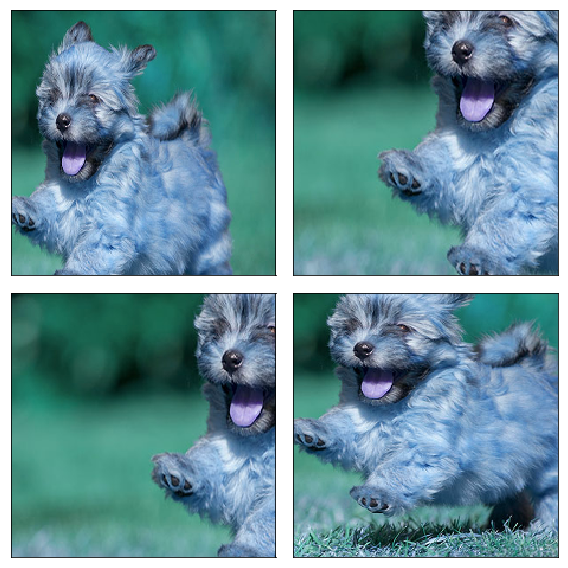

In [122]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for t, ax in enumerate(axes.flat):
    show_img(gnr._augment(img), ax=ax);
plt.tight_layout()